## Business Problem: Identifying Fuel Price Manipulation and Price Gouging in Kenya
<p><img style="float: top;margin:5px 20px 5px 1px; min-width:90%, max-height:20px" src="https://images.squarespace-cdn.com/content/v1/5acf87facc8fedbe1a9c205b/1523632453714-FACRKR4F8SRQD400SQRG/Lexo+Energy+petrol+fuel+station+Kenya+technology+3.jpg"></p>
<p><h5>Fuel prices in Kenya are often subject to fluctuations and inconsistencies, raising concerns about potential manipulation and unfair pricing practices. Consumers and regulators require insights into these dynamics for better transparency and market regulation.<br><br>
Objective: Utilize a Kenyan fuel price dataset to develop a data analysis model that can identify patterns and anomalies suggestive of fuel price manipulation and price gougin.</h5>
</p>

## Importing Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [70]:
df=pd.read_csv(r"C:\Users\DATA-JOHN\Desktop\Fuel Prices\Fuel Prices in Kenya since 2010 - Sheet1.csv")

df.head()

,Price Commencement Date,Premium Motor Spirit (PMS)/Super Petrol (KES/Litre),Automotive Gas Oil (AGO)/Diesel (KES/Litre),Illuminating Kerosene (IK)/Kerosene (KES/Litre),Mean Exchange Rate,Murban Crude Oil Prices ($ per barrel),Murban Crude Oil Prices (KES/Litre)
0,15/12/2010,94.03,87.45,75.83,80.57,89.15,45.18
1,15/01/2011,95.67,88.71,77.51,81.03,89.17,45.45
2,15/02/2011,98.08,91.72,79.52,81.47,88.58,45.39
3,15/03/2011,102.44,94.53,83.97,84.21,102.86,54.48
4,15/04/2011,111.17,107.52,90.91,83.89,109.53,57.79


## Data Exploration

In [71]:
#renaming columns
df=df.rename(columns={'Premium Motor Spirit (PMS)/Super Petrol (KES/Litre)':'Super Petrol (KES/Litre)',
                   'Automotive Gas Oil (AGO)/Diesel (KES/Litre)':'Diesel (KES/Litre)',
                   ' Illuminating Kerosene (IK)/Kerosene (KES/Litre)':'Kerosene (KES/Litre)',
                   'Murban Crude Oil Prices ($ per barrel)':'Crude Oil Prices ($ per barrel)',
                   'Murban Crude Oil Prices (KES/Litre)':'Crude Oil Prices (KES/Litre)'})


In [72]:
#checking missing data
df.isna().sum()

Price Commencement Date            0
Super Petrol (KES/Litre)           0
Diesel (KES/Litre)                 0
Kerosene (KES/Litre)               0
Mean Exchange Rate                 1
Crude Oil Prices ($ per barrel)    1
Crude Oil Prices (KES/Litre)       1
dtype: int64

In [73]:
df=df.dropna()

In [74]:
#checking column data types
df.dtypes

Price Commencement Date             object
Super Petrol (KES/Litre)           float64
Diesel (KES/Litre)                 float64
Kerosene (KES/Litre)               float64
Mean Exchange Rate                 float64
Crude Oil Prices ($ per barrel)    float64
Crude Oil Prices (KES/Litre)       float64
dtype: object

In [75]:
df['Price Commencement Date'] = pd.to_datetime(df['Price Commencement Date'], format='%d/%m/%Y')

In [76]:
df.dtypes

Price Commencement Date            datetime64[ns]
Super Petrol (KES/Litre)                  float64
Diesel (KES/Litre)                        float64
Kerosene (KES/Litre)                      float64
Mean Exchange Rate                        float64
Crude Oil Prices ($ per barrel)           float64
Crude Oil Prices (KES/Litre)              float64
dtype: object

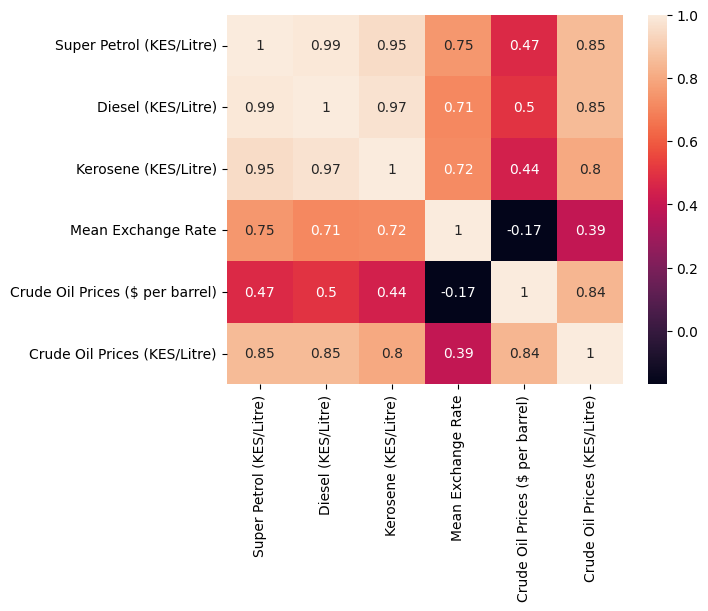

In [77]:
#checking columns correlation
matrix = df.corr(numeric_only=True).round(2)
sns.heatmap(matrix, annot=True)
plt.show()


In [78]:
print(df.columns)

Index(['Price Commencement Date', 'Super Petrol (KES/Litre)',
       'Diesel (KES/Litre)', 'Kerosene (KES/Litre)', 'Mean Exchange Rate',
       'Crude Oil Prices ($ per barrel)', 'Crude Oil Prices (KES/Litre)'],
      dtype='object')


In [79]:
df.drop(columns=["Price Commencement Date","Diesel (KES/Litre)", "Kerosene (KES/Litre)"], inplace=True)

In [80]:
df.isna().sum()

Super Petrol (KES/Litre)           0
Mean Exchange Rate                 0
Crude Oil Prices ($ per barrel)    0
Crude Oil Prices (KES/Litre)       0
dtype: int64

In [81]:
df.describe()

,Super Petrol (KES/Litre),Mean Exchange Rate,Crude Oil Prices ($ per barrel),Crude Oil Prices (KES/Litre)
count,156.000000,156.000000,156.000000,156.000000
mean,116.921795,102.175769,73.215897,46.676538
std,27.018611,15.491132,22.281470,15.268060
min,80.710000,80.570000,17.640000,11.850000
25%,101.275000,88.657500,54.160000,34.437500
50%,111.435000,101.385000,73.455000,45.940000
75%,118.207500,107.662500,93.612500,54.277500
max,217.360000,155.640000,117.530000,89.180000


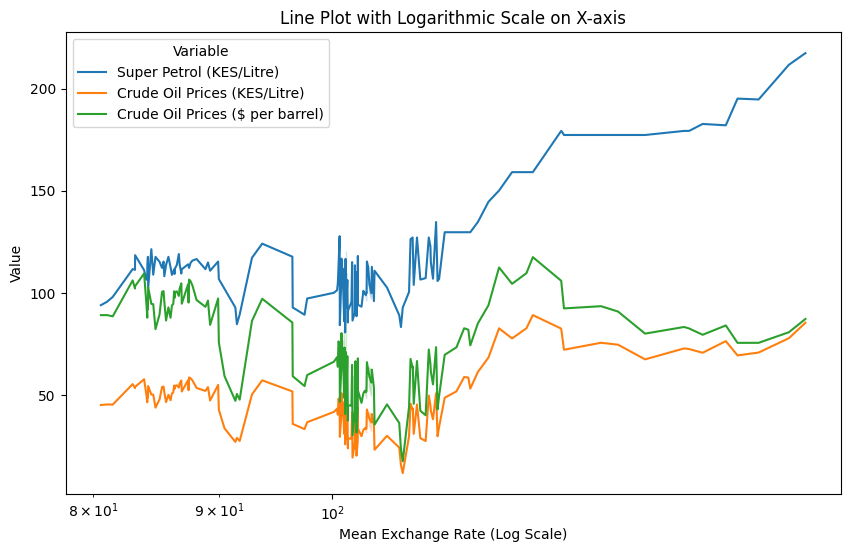

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data

# Melt the DataFrame to reshape it into long format
melted_df = df.melt(id_vars='Mean Exchange Rate', value_vars=['Super Petrol (KES/Litre)', 'Crude Oil Prices (KES/Litre)', 'Crude Oil Prices ($ per barrel)'], var_name='Variable', value_name='Value')

# Plot the lineplot using the melted DataFrame with log scale on x-axis
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.lineplot(data=melted_df, x='Mean Exchange Rate', y='Value', hue='Variable')

# Set logarithmic scale on x-axis
plt.xscale('log')

# Customize plot labels and legend
plt.xlabel('Mean Exchange Rate (Log Scale)')
plt.ylabel('Value')
plt.title('Line Plot with Logarithmic Scale on X-axis')
plt.legend(title='Variable')

# Show the plot
plt.show()


## Feature importance

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import metrics


x=df.drop(columns="Super Petrol (KES/Litre)")
y=df["Super Petrol (KES/Litre)"]

x_train,x_test,y_train,y_test=train_test_split(x,y,
                                              test_size=0.2,
                                              random_state=42)

feature_performance={}

for feature in ['Mean Exchange Rate','Crude Oil Prices ($ per barrel)', 'Crude Oil Prices (KES/Litre)']:
    lr=LinearRegression()
    lr.fit(x_train[[feature]],y_train)
    y_pred=lr.predict(x_test[[feature]])
    rmae = mean_absolute_error(y_test, y_pred)**(1/2)
    print(f"rmae for {feature}: {rmae}")

rmae for Mean Exchange Rate: 3.780279993053204
rmae for Crude Oil Prices ($ per barrel): 3.753049773107865
rmae for Crude Oil Prices (KES/Litre): 3.097726152210238


## Model Building

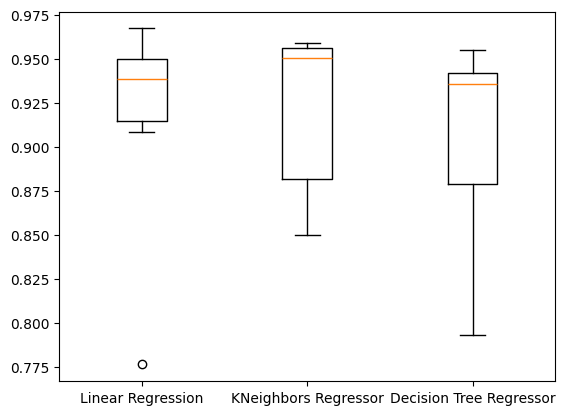

In [88]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split


SEED=45

x=df.drop('Super Petrol (KES/Litre)',axis=1).values
y=df['Super Petrol (KES/Litre)'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,
                                              test_size=0.2,
                                              random_state=SEED)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

lr=LinearRegression()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()

regressors={
    'Linear Regression':LinearRegression(),
    'KNeighbors Regressor':KNeighborsRegressor(),
    'Decision Tree Regressor':DecisionTreeRegressor()
}

regressors_vc=[('Linear Regression',lr),
    ('KNeighbors Regressor',knn),
    ('Decision Tree Regressor',dt)]

results=[]

for model in regressors.values():
    kf=KFold(n_splits=6,random_state=SEED,shuffle=True)
    cv_results=cross_val_score(model,x_train_scaled,y_train, cv=kf)
    results.append(cv_results)

plt.boxplot(results,labels=regressors.keys())
plt.show()

    

Linear Regression Test set Accuracy: 0.946
KNeighbors Regressor Test set Accuracy: 0.942
Decision Tree Regressor Test set Accuracy: 0.959


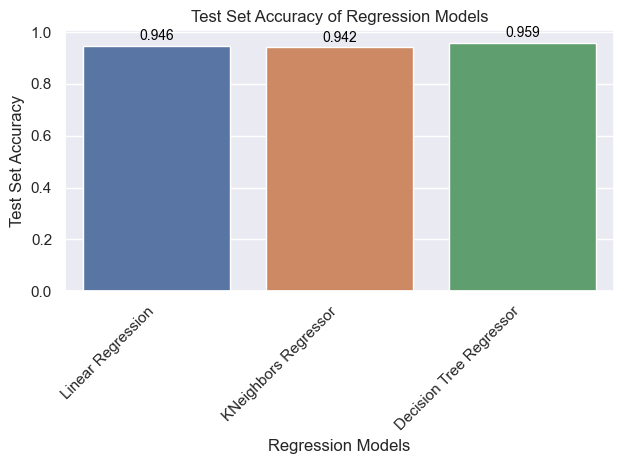

In [89]:

accuracies = {}  # Dictionary to store model names and corresponding test set accuracies

for name, model in regressors.items():
    model.fit(x_train_scaled, y_train)
    test_score = model.score(x_test_scaled, y_test)
    accuracies[name] = test_score  # Store the accuracy in the dictionary
    print("{} Test set Accuracy: {:.3f}".format(name, test_score))

# Plotting the bar graph using Seaborn
sns.set(style="darkgrid")  # Set style for the plot
palette = sns.color_palette("tab10", len(accuracies))  # Define a color palette for the bars
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), hue=list(accuracies.keys()), legend=False)

# Add model scores at the top of each bar rounded to three decimal places
for i, v in enumerate(accuracies.values()):
    ax.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Regression Models')
plt.ylabel('Test Set Accuracy')
plt.title('Test Set Accuracy of Regression Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


In [90]:
vc=VotingRegressor(estimators=regressors_vc)
vc.fit(x_train_scaled,y_train)
y_pred=vc.predict(x_test)

print("Voting Regressor: {:.3f}".format(vc.score(x_test_scaled, y_test)))

Voting Regressor: 0.962


## Save the trained model using pickle

In [91]:
import pickle

vc.fit(x_train_scaled, y_train)
y_pred = vc.predict(x_test)

# Save the trained model using pickle
with open('voting_regressor_model.pkl', 'wb') as file:
    pickle.dump(vc, file)

In [99]:
import pickle
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)


with open('voting_regressor_model.pkl', 'wb') as file:
    pickle.dump((vc, scaler), file)



def predict_super_petrol(mean_exchange_rate, crude_oil_prices_usd_per_barrel, crude_oil_prices_kes_per_litre):
    # Load the model and scaler
    with open('voting_regressor_model.pkl', 'rb') as file:
        loaded_model, loaded_scaler = pickle.load(file)

    # Scale the input features using the loaded scaler
    input_features = [[mean_exchange_rate,crude_oil_prices_usd_per_barrel, crude_oil_prices_kes_per_litre]]
    input_features_scaled = loaded_scaler.transform(input_features)

    # Make the prediction using the loaded model
    predicted_super_petrol = loaded_model.predict(input_features_scaled)

    return predicted_super_petrol[0]

# Example usage:
mean_exchange_rate_input = 140
crude_oil_prices_usd_per_barrel_input = 85.56
crude_oil_prices_kes_per_litre_input = 70.25
predicted_super_petrol_value = predict_super_petrol(mean_exchange_rate_input,crude_oil_prices_usd_per_barrel_input, crude_oil_prices_kes_per_litre_input)
print(f'Predicted Super Petrol (KES/Litre): {predicted_super_petrol_value}')


Predicted Super Petrol (KES/Litre): 183.85068543985562
